# 머신러닝 모델 적용

In [1]:
# 필요라이브러리
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import talib
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 경고 문구 삭제
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# matplotlib 한글 사용
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [4]:
df = pd.read_csv('./전처리 데이터/증권뉴스_최종(2010_2021).csv', index_col='Date')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

Close     Open     High      Low       Volume  Change        점수  \
Date                                                                            
2010-01-08  1695.26  1694.06  1695.26  1668.84  379950000.0  0.0070  0.450382   
2010-01-11  1694.12  1700.79  1705.73  1694.12  407680000.0 -0.0007  0.488550   
2010-01-12  1698.64  1695.83  1701.16  1683.29  383760000.0  0.0027  0.450382   
2010-01-13  1671.41  1683.51  1687.58  1671.11  361930000.0 -0.0160  0.419847   
2010-01-14  1685.77  1680.68  1692.78  1677.46  433750000.0  0.0086  0.450382   
...             ...      ...      ...      ...          ...     ...       ...   
2021-11-24  2994.29  3006.34  3017.90  2981.02  556640000.0 -0.0010  0.419847   
2021-11-25  2980.27  2996.74  2996.74  2973.24  595970000.0 -0.0047  0.412214   
2021-11-26  2936.44  2973.04  2985.77  2930.31  595600000.0 -0.0147  0.343511   
2021-11-29  2909.32  2906.15  2930.22  2890.78  844400000.0 -0.0092  0.427481   
2021-11-30  2839.01  2932.71  2942.93  2822.73  983560000.0 -0.0242  0.473282   

                긍정개수      부정개수      중립개수  ...   new중립개수   new긍정비율   new부정비율  \
Date                                      ...                                 
2010-01-08  0.136364  0.193548  0.399116  ...  0.302205  0.421705  0.244114   
2010-01-11  0.136364  0.000000  0.579582  ...  0.471466  0.419805  0.172893   
2010-01-12  0.136364  0.129032  0.449759  ...  0.383268  0.351618  0.208858   
2010-01-13  0.022727  0.064516  0.455788  ...  0.344358  0.340538  0.332689   
2010-01-14  0.068182  0.032258  0.466238  ...  0.361868  0.471558  0.156545   
...              ...       ...       ...  ...       ...       ...       ...   
2021-11-24  0.090909  0.129032  0.342846  ...  0.252270  0.514372  0.158327   
2021-11-25  0.022727  0.064516  0.317122  ...  0.223087  0.504710  0.202421   
2021-11-26  0.045455  0.225806  0.275723  ...  0.190661  0.488024  0.241743   
2021-11-29  0.090909  0.129032  0.456994  ...  0.358625  0.329607  0.314063   
2021-11-30  0.159091  0.161290  0.374196  ...  0.284047  0.383095  0.286809   

             new중립비율  new종가-시가  new비율점수  new종가-시가증감  new감성어_Change  \
Date                                                                 
2010-01-08  0.437963  0.604770      1.0           1       0.119629   
2010-01-11  0.500866  0.576715      1.0           0       0.119903   
2010-01-12  0.537822  0.610509      1.0           1       0.116026   
2010-01-13  0.442749  0.557358      1.0           0       0.115465   
2010-01-14  0.463438  0.618637      1.0           1       0.120817   
...              ...       ...      ...         ...            ...   
2021-11-24  0.419361  0.557536      1.0           0       0.119946   
2021-11-25  0.391188  0.541780      1.0           0       0.117900   
2021-11-26  0.374084  0.470020      1.0           0       0.117633   
2021-11-29  0.469569  0.611792      1.0           1       0.116259   
2021-11-30  0.439758  0.266469      1.0           0       0.119388   

            new감성어5일_Change  new감성어5일이동평균  
Date                                       
2010-01-08         0.162528         211.2  
2010-01-11         0.166010         169.0  
2010-01-12         0.163814         168.4  
2010-01-13         0.165003         142.8  
2010-01-14         0.167140         136.8  
...                     ...           ...  
2021-11-24         0.166844         182.6  
2021-11-25         0.165032         196.0  
2021-11-26         0.161776         182.2  
2021-11-29         0.164559         137.2  
2021-11-30         0.163237         128.2  

[2937 rows x 32 columns]

In [5]:
# 이동 평균
df['증권감성_MA5'] = talib.SMA(df['new점수'],timeperiod=5)
df['증권감성_MA10'] = talib.SMA(df['new점수'],timeperiod=10)
df['일반감성_MA5'] = talib.SMA(df['점수'],timeperiod=5)
df['일반감성_MA10'] = talib.SMA(df['점수'],timeperiod=10)
df['MA5'] = talib.SMA(df['Close'],timeperiod=5)
df['MA10'] = talib.SMA(df['Close'],timeperiod=10)

In [6]:
# MACD(Moving Average Convergence & Divergence) 지표
macd, macdsignal, macdhist = talib.MACD(df['Close'],fastperiod=12, slowperiod=26,signalperiod=9)
df['MACD'] = macd
macd, macdsignal, macdhist = talib.MACD(df['new점수'],fastperiod=12, slowperiod=26,signalperiod=9)
df['증권감성_MACD'] = macd
macd, macdsignal, macdhist = talib.MACD(df['점수'],fastperiod=12, slowperiod=26,signalperiod=9)
df['일반감성_MACD'] = macd

In [7]:
# 보조지표 생성으로 발생한 nan값 드랍처리
kospi_df = df.dropna()
kospi_df

Close     Open     High      Low       Volume  Change        점수  \
Date                                                                            
2010-02-25  1587.51  1620.25  1621.84  1582.22  403210000.0 -0.0157  0.427481   
2010-02-26  1594.58  1593.73  1596.55  1580.70  331760000.0  0.0045  0.419847   
2010-03-02  1615.12  1612.43  1620.15  1608.97  415100000.0  0.0129  0.396947   
2010-03-03  1622.44  1615.25  1622.63  1611.35  403470000.0  0.0045  0.419847   
2010-03-04  1618.20  1625.35  1631.10  1612.47  383040000.0 -0.0026  0.854962   
...             ...      ...      ...      ...          ...     ...       ...   
2021-11-24  2994.29  3006.34  3017.90  2981.02  556640000.0 -0.0010  0.419847   
2021-11-25  2980.27  2996.74  2996.74  2973.24  595970000.0 -0.0047  0.412214   
2021-11-26  2936.44  2973.04  2985.77  2930.31  595600000.0 -0.0147  0.343511   
2021-11-29  2909.32  2906.15  2930.22  2890.78  844400000.0 -0.0092  0.427481   
2021-11-30  2839.01  2932.71  2942.93  2822.73  983560000.0 -0.0242  0.473282   

                긍정개수      부정개수      중립개수  ...  new감성어5일이동평균  증권감성_MA5  \
Date                                      ...                           
2010-02-25  0.159091  0.258065  0.504421  ...         191.2  0.487150   
2010-02-26  0.022727  0.064516  0.445740  ...         191.4  0.491702   
2010-03-02  0.113636  0.225806  0.691720  ...         150.8  0.492556   
2010-03-03  0.090909  0.193548  0.498794  ...         174.4  0.489995   
2010-03-04  0.681818  0.064516  0.498392  ...         196.8  0.492840   
...              ...       ...       ...  ...           ...       ...   
2021-11-24  0.090909  0.129032  0.342846  ...         182.6  0.491228   
2021-11-25  0.022727  0.064516  0.317122  ...         196.0  0.493789   
2021-11-26  0.045455  0.225806  0.275723  ...         182.2  0.483167   
2021-11-29  0.090909  0.129032  0.456994  ...         137.2  0.456046   
2021-11-30  0.159091  0.161290  0.374196  ...         128.2  0.454528   

            증권감성_MA10  일반감성_MA5  일반감성_MA10       MA5      MA10       MACD  \
Date                                                                        
2010-02-25   0.500237  0.442748   0.467939  1610.048  1609.138 -22.941957   
2010-02-26   0.493836  0.433588   0.462595  1610.184  1608.815 -22.190942   
2010-03-02   0.504315  0.425954   0.454962  1607.788  1610.961 -19.711132   
2010-03-03   0.504410  0.429008   0.452672  1606.496  1613.100 -16.959702   
2010-03-04   0.494737  0.503817   0.483206  1607.570  1612.177 -14.948983   
...               ...       ...        ...       ...       ...        ...   
2021-11-24   0.506496  0.403053   0.425191  2984.654  2977.614  -8.214114   
2021-11-25   0.509673  0.396947   0.419847  2991.232  2983.149  -7.774407   
2021-11-26   0.501707  0.381679   0.414504  2984.316  2979.913 -10.837720   
2021-11-29   0.481603  0.400000   0.411450  2963.530  2970.893 -15.277664   
2021-11-30   0.475818  0.415267   0.412214  2931.866  2955.073 -24.190923   

            증권감성_MACD  일반감성_MACD  
Date                              
2010-02-25   0.004129  -0.007779  
2010-02-26   0.002386  -0.010399  
2010-03-02   0.009012  -0.014160  
2010-03-03   0.008617  -0.015119  
2010-03-04   0.005107   0.019013  
...               ...        ...  
2021-11-24  -0.001489  -0.009233  
2021-11-25  -0.003851  -0.009259  
2021-11-26  -0.007285  -0.014655  
2021-11-29  -0.012199  -0.012016  
2021-11-30  -0.014813  -0.006159  

[2904 rows x 41 columns]

In [8]:
kospi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2904 entries, 2010-02-25 to 2021-11-30
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Close            2904 non-null   float64
 1   Open             2904 non-null   float64
 2   High             2904 non-null   float64
 3   Low              2904 non-null   float64
 4   Volume           2904 non-null   float64
 5   Change           2904 non-null   float64
 6   점수               2904 non-null   float64
 7   긍정개수             2904 non-null   float64
 8   부정개수             2904 non-null   float64
 9   중립개수             2904 non-null   float64
 10  긍정비율             2904 non-null   float64
 11  부정비율             2904 non-null   float64
 12  중립비율             2904 non-null   float64
 13  종가-시가            2904 non-null   float64
 14  비율점수             2904 non-null   float64
 15  종가-시가증감          2904 non-null   int64  
 16  감성어_Change       2904 non-null   float64
 17  감성어5

In [9]:
# 특정 열 정규화 (y값 제외, x값 항목 정규화)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(kospi_df.iloc[:,:15])

kospi_df.iloc[:,:15] = scaled_values

In [10]:
kospi_df.iloc[:,:15]

점수      긍정개수      부정개수      중립개수      긍정비율      부정비율  \
Date                                                                     
2010-02-25  0.427481  0.159091  0.258065  0.504421  0.177742  0.274021   
2010-02-26  0.419847  0.022727  0.064516  0.445740  0.028874  0.077901   
2010-03-02  0.396947  0.113636  0.225806  0.691720  0.093805  0.177156   
2010-03-03  0.419847  0.090909  0.193548  0.498794  0.103062  0.208541   
2010-03-04  0.854962  0.681818  0.064516  0.498392  0.760591  0.068401   
...              ...       ...       ...       ...       ...       ...   
2021-11-24  0.419847  0.090909  0.129032  0.342846  0.147672  0.199205   
2021-11-25  0.412214  0.022727  0.064516  0.317122  0.039980  0.107863   
2021-11-26  0.343511  0.045455  0.225806  0.275723  0.090512  0.427343   
2021-11-29  0.427481  0.090909  0.129032  0.456994  0.112281  0.151463   
2021-11-30  0.473282  0.159091  0.161290  0.374196  0.236869  0.228235   

                중립비율     종가-시가  비율점수  
Date                                  
2010-02-25  0.622137  0.483780   0.0  
2010-02-26  0.914062  0.603522   0.0  
2010-03-02  0.776650  0.610081   0.0  
2010-03-03  0.744384  0.626123   0.0  
2010-03-04  0.195122  0.575004   1.0  
...              ...       ...   ...  
2021-11-24  0.706992  0.557536   0.0  
2021-11-25  0.881010  0.541780   0.0  
2021-11-26  0.595918  0.470020   0.0  
2021-11-29  0.777215  0.611792   0.0  
2021-11-30  0.597152  0.266469   1.0  

[2904 rows x 9 columns]

In [11]:
kospi_df.iloc[:,16:]

감성어_Change  감성어5일_Change  감성어5일이동평균     new점수   new긍정개수   new부정개수  \
Date                                                                            
2010-02-25    0.591398      0.406780        1.2  0.449976  0.263377  0.205758   
2010-02-26    0.521505      0.338983        0.2  0.472262  0.245309  0.143946   
2010-03-02    0.522581      0.325424       -0.2  0.572783  0.422516  0.180356   
2010-03-03    0.500000      0.389831       -0.4  0.504030  0.307158  0.162574   
2010-03-04    0.527273      0.339291       -2.0  0.465149  0.268242  0.184589   
...                ...           ...        ...       ...       ...       ...   
2021-11-24    0.500000      0.347458       -3.8  0.490754  0.241140  0.105843   
2021-11-25    0.519713      0.327684       -4.4  0.471788  0.218902  0.112616   
2021-11-26    0.524194      0.320621       -4.6  0.451399  0.187630  0.110923   
2021-11-29    0.397849      0.254237       -4.4  0.422475  0.232801  0.217612   
2021-11-30    0.529032      0.345763       -3.6  0.436226  0.212648  0.168501   

             new중립개수   new긍정비율   new부정비율   new중립비율  ...  new감성어5일이동평균  \
Date                                                ...                 
2010-02-25  0.420233  0.339651  0.249234  0.515126  ...         191.2   
2010-02-26  0.381971  0.371678  0.173349  0.548305  ...         191.4   
2010-03-02  0.591440  0.429822  0.113823  0.541516  ...         150.8   
2010-03-03  0.400130  0.432917  0.174553  0.486413  ...         174.4   
2010-03-04  0.433204  0.348212  0.209877  0.540335  ...         196.8   
...              ...       ...       ...       ...  ...           ...   
2021-11-24  0.252270  0.514372  0.158327  0.419361  ...         182.6   
2021-11-25  0.223087  0.504710  0.202421  0.391188  ...         196.0   
2021-11-26  0.190661  0.488024  0.241743  0.374084  ...         182.2   
2021-11-29  0.358625  0.329607  0.314063  0.469569  ...         137.2   
2021-11-30  0.284047  0.383095  0.286809  0.439758  ...         128.2   

            증권감성_MA5  증권감성_MA10  일반감성_MA5  일반감성_MA10       MA5      MA10  \
Date                                                                       
2010-02-25  0.487150   0.500237  0.442748   0.467939  1610.048  1609.138   
2010-02-26  0.491702   0.493836  0.433588   0.462595  1610.184  1608.815   
2010-03-02  0.492556   0.504315  0.425954   0.454962  1607.788  1610.961   
2010-03-03  0.489995   0.504410  0.429008   0.452672  1606.496  1613.100   
2010-03-04  0.492840   0.494737  0.503817   0.483206  1607.570  1612.177   
...              ...        ...       ...        ...       ...       ...   
2021-11-24  0.491228   0.506496  0.403053   0.425191  2984.654  2977.614   
2021-11-25  0.493789   0.509673  0.396947   0.419847  2991.232  2983.149   
2021-11-26  0.483167   0.501707  0.381679   0.414504  2984.316  2979.913   
2021-11-29  0.456046   0.481603  0.400000   0.411450  2963.530  2970.893   
2021-11-30  0.454528   0.475818  0.415267   0.412214  2931.866  2955.073   

                 MACD  증권감성_MACD  일반감성_MACD  
Date                                         
2010-02-25 -22.941957   0.004129  -0.007779  
2010-02-26 -22.190942   0.002386  -0.010399  
2010-03-02 -19.711132   0.009012  -0.014160  
2010-03-03 -16.959702   0.008617  -0.015119  
2010-03-04 -14.948983   0.005107   0.019013  
...               ...        ...        ...  
2021-11-24  -8.214114  -0.001489  -0.009233  
2021-11-25  -7.774407  -0.003851  -0.009259  
2021-11-26 -10.837720  -0.007285  -0.014655  
2021-11-29 -15.277664  -0.012199  -0.012016  
2021-11-30 -24.190923  -0.014813  -0.006159  

[2904 rows x 25 columns]

In [12]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(kospi_df.iloc[:,16:])

kospi_df.iloc[:,16:] = scaled_values

# X, Y 피쳐 설정

In [363]:
# 기술 + 일반 + 증권
# x = kospi_df[['Close','Open','High','Low','Volume','Change','MA5','MA10','MACD','종가-시가',
#               '점수','긍정개수','부정개수','중립개수','긍정비율','부정비율','중립비율','비율점수',
#               '감성어_Change','감성어5일_Change','일반감성_MA5','일반감성_MA10','일반감성_MACD',
#               'new점수','new긍정개수','new부정개수','new중립개수','new긍정비율','new부정비율','new중립비율',
#               '증권감성_MA5','증권감성_MA10','증권감성_MACD',
#                'new감성어_Change','new감성어5일_Change','new비율점수']]
# 기술 + 일반
# x = kospi_df[['Close','Open','High','Low','Volume','Change','MA5','MA10','MACD','종가-시가',
#               '점수','긍정개수','부정개수','중립개수','긍정비율','부정비율','중립비율','비율점수',
#               '감성어_Change','감성어5일_Change','일반감성_MA5','일반감성_MA10','일반감성_MACD']]
# 기술 + 증권
# x = kospi_df[['Close','Open','High','Low','Volume','Change','MA5','MA10','MACD','종가-시가',
#               'new점수','new긍정비율','new부정비율','new중립비율',
#               '증권감성_MA5','증권감성_MA10','증권감성_MACD',
#                'new감성어_Change','new감성어5일_Change','new비율점수']]
# 기술
# x = kospi_df[['Close','Open','High','Low','Volume','Change','MA5','MA10','MACD','종가-시가']]
# 증권+일반
# x = kospi_df[['점수','긍정비율','부정비율','중립비율','비율점수',
#               '감성어_Change','감성어5일_Change',
#               'new점수','new긍정비율','new부정비율','new중립비율',
#                'new감성어_Change','new감성어5일_Change','new비율점수']]

# 증권
x = kospi_df[['new점수','new긍정비율','new부정비율',
              'new중립비율','new감성어_Change','new감성어5일_Change','new비율점수']]
# 일반
# x = kospi_df[['점수','긍정비율','부정비율','중립비율','비율점수',
#               '감성어_Change','감성어5일_Change']]

y = kospi_df['종가-시가증감']

# 데이터 분리

In [364]:
#train 데이터와 test 데이터 분리과정 

train_test_split=2200
x_train = x.iloc[:train_test_split-1, :]
y_train = y.iloc[1:train_test_split]

x_test = x.iloc[train_test_split-1:-1, :]
y_test = y.iloc[train_test_split:]

In [336]:
x_train

new점수   new긍정비율   new부정비율   new중립비율  new감성어_Change  \
Date                                                                
2010-02-25  0.449976  0.339651  0.249234  0.515126       0.118528   
2010-02-26  0.472262  0.371678  0.173349  0.548305       0.119360   
2010-03-02  0.572783  0.429822  0.113823  0.541516       0.120241   
2010-03-03  0.504030  0.432917  0.174553  0.486413       0.116783   
2010-03-04  0.465149  0.348212  0.209877  0.540335       0.117081   
...              ...       ...       ...       ...            ...   
2019-01-16  0.731152  0.791736  0.111130  0.184139       0.118663   
2019-01-17  0.687530  0.828832  0.168980  0.097711       0.118122   
2019-01-18  0.715979  0.849787  0.101473  0.134719       0.118842   
2019-01-21  0.755808  0.721468  0.115570  0.250171       0.118909   
2019-01-22  0.579896  0.628453  0.286844  0.195883       0.115759   

            new감성어5일_Change  new비율점수  
Date                                  
2010-02-25         0.166058      1.0  
2010-02-26         0.163093      1.0  
2010-03-02         0.166844      1.0  
2010-03-03         0.167237      1.0  
2010-03-04         0.166543      1.0  
...                     ...      ...  
2019-01-16         0.166849      1.0  
2019-01-17         0.165801      1.0  
2019-01-18         0.166824      1.0  
2019-01-21         0.166292      1.0  
2019-01-22         0.163942      1.0  

[2199 rows x 7 columns]

In [338]:
x_test

new점수   new긍정비율   new부정비율   new중립비율  new감성어_Change  \
Date                                                                
2019-01-23  0.640114  0.740754  0.205190  0.154226       0.119311   
2019-01-24  0.701754  0.755380  0.138141  0.197131       0.119182   
2019-01-25  0.724040  0.777809  0.112479  0.196825       0.118779   
2019-01-28  0.685159  0.603514  0.179830  0.312347       0.118168   
2019-01-29  0.577525  0.597527  0.306517  0.209765       0.116830   
...              ...       ...       ...       ...            ...   
2021-11-23  0.443812  0.448501  0.303522  0.360438       0.112646   
2021-11-24  0.490754  0.514372  0.158327  0.419361       0.119946   
2021-11-25  0.471788  0.504710  0.202421  0.391188       0.117900   
2021-11-26  0.451399  0.488024  0.241743  0.374084       0.117633   
2021-11-29  0.422475  0.329607  0.314063  0.469569       0.116259   

            new감성어5일_Change  new비율점수  
Date                                  
2019-01-23         0.165535      1.0  
2019-01-24         0.165917      1.0  
2019-01-25         0.165784      1.0  
2019-01-28         0.166990      1.0  
2019-01-29         0.165160      1.0  
...                     ...      ...  
2021-11-23         0.162607      1.0  
2021-11-24         0.166844      1.0  
2021-11-25         0.165032      1.0  
2021-11-26         0.161776      1.0  
2021-11-29         0.164559      1.0  

[704 rows x 7 columns]

In [334]:
y_train

Date
2010-02-26    1
2010-03-02    1
2010-03-03    1
2010-03-04    0
2010-03-05    1
             ..
2019-01-17    0
2019-01-18    1
2019-01-21    0
2019-01-22    0
2019-01-23    1
Name: 종가-시가증감, Length: 2199, dtype: int64

In [339]:
y_test

Date
2019-01-24    1
2019-01-25    1
2019-01-28    0
2019-01-29    1
2019-01-30    1
             ..
2021-11-24    0
2021-11-25    0
2021-11-26    0
2021-11-29    1
2021-11-30    0
Name: 종가-시가증감, Length: 704, dtype: int64

# 분류모델 적용

In [365]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print(classification_report(y_test, pred))
    print('정확도 :', round(accuracy, 2), '정밀도 :', round(precision, 2), '재현율 :', round(recall, 2), 
         'F1 :', round(f1,2), 'AUC :', round(roc_auc, 2))

# Decision Tree

In [366]:
# 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_pred_proba = tree.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, tree_pred, tree_pred_proba)

오차행렬
[[205 144]
 [211 144]]
              precision    recall  f1-score   support

           0       0.49      0.59      0.54       349
           1       0.50      0.41      0.45       355

    accuracy                           0.50       704
   macro avg       0.50      0.50      0.49       704
weighted avg       0.50      0.50      0.49       704

정확도 : 0.5 정밀도 : 0.5 재현율 : 0.41 F1 : 0.45 AUC : 0.5


# Random Forest

In [367]:
# 2
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_pred_proba = rfc.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, rfc_pred, rfc_pred_proba)

오차행렬
[[240 109]
 [229 126]]
              precision    recall  f1-score   support

           0       0.51      0.69      0.59       349
           1       0.54      0.35      0.43       355

    accuracy                           0.52       704
   macro avg       0.52      0.52      0.51       704
weighted avg       0.52      0.52      0.51       704

정확도 : 0.52 정밀도 : 0.54 재현율 : 0.35 F1 : 0.43 AUC : 0.54


In [368]:
# 3
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred_proba = lr.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[346   3]
 [353   2]]
              precision    recall  f1-score   support

           0       0.49      0.99      0.66       349
           1       0.40      0.01      0.01       355

    accuracy                           0.49       704
   macro avg       0.45      0.50      0.34       704
weighted avg       0.45      0.49      0.33       704

정확도 : 0.49 정밀도 : 0.4 재현율 : 0.01 F1 : 0.01 AUC : 0.49


In [369]:
# 4
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(x_train, y_train)
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_proba = lgbm_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba)

오차행렬
[[241 108]
 [211 144]]
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       349
           1       0.57      0.41      0.47       355

    accuracy                           0.55       704
   macro avg       0.55      0.55      0.54       704
weighted avg       0.55      0.55      0.54       704

정확도 : 0.55 정밀도 : 0.57 재현율 : 0.41 F1 : 0.47 AUC : 0.54


In [345]:
lgbm_pred.shape

(704,)

In [370]:
# 5
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
XGB_pred = XGB.predict(x_test)
XGB_pred_proba = XGB.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, XGB_pred, XGB_pred_proba)

[14:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차행렬
[[223 126]
 [201 154]]
              precision    recall  f1-score   support

           0       0.53      0.64      0.58       349
           1       0.55      0.43      0.49       355

    accuracy                           0.54       704
   macro avg       0.54      0.54      0.53       704
weighted avg       0.54      0.54      0.53       704

정확도 : 0.54 정밀도 : 0.55 재현율 : 0.43 F1 : 0.49 AUC : 0.55


# Back Testing

In [371]:
temp_df = pd.DataFrame(x_test)
temp_df

new점수   new긍정비율   new부정비율   new중립비율  new감성어_Change  \
Date                                                                
2019-01-23  0.640114  0.740754  0.205190  0.154226       0.119311   
2019-01-24  0.701754  0.755380  0.138141  0.197131       0.119182   
2019-01-25  0.724040  0.777809  0.112479  0.196825       0.118779   
2019-01-28  0.685159  0.603514  0.179830  0.312347       0.118168   
2019-01-29  0.577525  0.597527  0.306517  0.209765       0.116830   
...              ...       ...       ...       ...            ...   
2021-11-23  0.443812  0.448501  0.303522  0.360438       0.112646   
2021-11-24  0.490754  0.514372  0.158327  0.419361       0.119946   
2021-11-25  0.471788  0.504710  0.202421  0.391188       0.117900   
2021-11-26  0.451399  0.488024  0.241743  0.374084       0.117633   
2021-11-29  0.422475  0.329607  0.314063  0.469569       0.116259   

            new감성어5일_Change  new비율점수  
Date                                  
2019-01-23         0.165535      1.0  
2019-01-24         0.165917      1.0  
2019-01-25         0.165784      1.0  
2019-01-28         0.166990      1.0  
2019-01-29         0.165160      1.0  
...                     ...      ...  
2021-11-23         0.162607      1.0  
2021-11-24         0.166844      1.0  
2021-11-25         0.165032      1.0  
2021-11-26         0.161776      1.0  
2021-11-29         0.164559      1.0  

[704 rows x 7 columns]

In [372]:
temp_df['log_pred'] = lr_pred
temp_df['rfc_pred'] = rfc_pred
temp_df['tree_pred'] = tree_pred
temp_df['lgbm_pred'] = lgbm_pred
temp_df['XGB_pred'] = XGB_pred
temp_df

new점수   new긍정비율   new부정비율   new중립비율  new감성어_Change  \
Date                                                                
2019-01-23  0.640114  0.740754  0.205190  0.154226       0.119311   
2019-01-24  0.701754  0.755380  0.138141  0.197131       0.119182   
2019-01-25  0.724040  0.777809  0.112479  0.196825       0.118779   
2019-01-28  0.685159  0.603514  0.179830  0.312347       0.118168   
2019-01-29  0.577525  0.597527  0.306517  0.209765       0.116830   
...              ...       ...       ...       ...            ...   
2021-11-23  0.443812  0.448501  0.303522  0.360438       0.112646   
2021-11-24  0.490754  0.514372  0.158327  0.419361       0.119946   
2021-11-25  0.471788  0.504710  0.202421  0.391188       0.117900   
2021-11-26  0.451399  0.488024  0.241743  0.374084       0.117633   
2021-11-29  0.422475  0.329607  0.314063  0.469569       0.116259   

            new감성어5일_Change  new비율점수  log_pred  rfc_pred  tree_pred  \
Date                                                                  
2019-01-23         0.165535      1.0         0         1          1   
2019-01-24         0.165917      1.0         0         0          0   
2019-01-25         0.165784      1.0         0         0          1   
2019-01-28         0.166990      1.0         0         1          1   
2019-01-29         0.165160      1.0         0         1          1   
...                     ...      ...       ...       ...        ...   
2021-11-23         0.162607      1.0         0         0          1   
2021-11-24         0.166844      1.0         0         0          0   
2021-11-25         0.165032      1.0         0         0          0   
2021-11-26         0.161776      1.0         0         0          0   
2021-11-29         0.164559      1.0         0         1          0   

            lgbm_pred  XGB_pred  
Date                             
2019-01-23          1         1  
2019-01-24          0         0  
2019-01-25          0         1  
2019-01-28          1         1  
2019-01-29          1         1  
...               ...       ...  
2021-11-23          0         0  
2021-11-24          0         0  
2021-11-25          0         0  
2021-11-26          1         0  
2021-11-29          1         1  

[704 rows x 12 columns]

In [373]:
val_df = pd.merge(temp_df,kospi_df, how='inner',left_index=True,right_index=True)
val_df

new점수_x  new긍정비율_x  new부정비율_x  new중립비율_x  new감성어_Change_x  \
Date                                                                     
2019-01-23  0.640114   0.740754   0.205190   0.154226         0.119311   
2019-01-24  0.701754   0.755380   0.138141   0.197131         0.119182   
2019-01-25  0.724040   0.777809   0.112479   0.196825         0.118779   
2019-01-28  0.685159   0.603514   0.179830   0.312347         0.118168   
2019-01-29  0.577525   0.597527   0.306517   0.209765         0.116830   
...              ...        ...        ...        ...              ...   
2021-11-23  0.443812   0.448501   0.303522   0.360438         0.112646   
2021-11-24  0.490754   0.514372   0.158327   0.419361         0.119946   
2021-11-25  0.471788   0.504710   0.202421   0.391188         0.117900   
2021-11-26  0.451399   0.488024   0.241743   0.374084         0.117633   
2021-11-29  0.422475   0.329607   0.314063   0.469569         0.116259   

            new감성어5일_Change_x  new비율점수_x  log_pred  rfc_pred  tree_pred  ...  \
Date                                                                     ...   
2019-01-23           0.165535        1.0         0         1          1  ...   
2019-01-24           0.165917        1.0         0         0          0  ...   
2019-01-25           0.165784        1.0         0         0          1  ...   
2019-01-28           0.166990        1.0         0         1          1  ...   
2019-01-29           0.165160        1.0         0         1          1  ...   
...                       ...        ...       ...       ...        ...  ...   
2021-11-23           0.162607        1.0         0         0          1  ...   
2021-11-24           0.166844        1.0         0         0          0  ...   
2021-11-25           0.165032        1.0         0         0          0  ...   
2021-11-26           0.161776        1.0         0         0          0  ...   
2021-11-29           0.164559        1.0         0         1          0  ...   

            new감성어5일이동평균  증권감성_MA5  증권감성_MA10  일반감성_MA5  일반감성_MA10       MA5  \
Date                                                                           
2019-01-23      0.731685  0.751632   0.743153  0.367769   0.393750  0.330119   
2019-01-24      0.713370  0.756527   0.761491  0.326446   0.387500  0.334450   
2019-01-25      0.707875  0.759302   0.763959  0.334711   0.409375  0.340547   
2019-01-28      0.695604  0.734987   0.780063  0.384298   0.418750  0.346558   
2019-01-29      0.736264  0.734171   0.744446  0.376033   0.418750  0.354039   
...                  ...       ...        ...       ...        ...       ...   
2021-11-23      0.462271  0.444027   0.309980  0.268595   0.321875  0.819456   
2021-11-24      0.432784  0.433910   0.314564  0.252066   0.325000  0.823091   
2021-11-25      0.445055  0.438316   0.322440  0.235537   0.303125  0.826843   
2021-11-26      0.432418  0.420039   0.302692  0.194215   0.281250  0.822898   
2021-11-29      0.391209  0.373368   0.252851  0.243802   0.268750  0.811043   

                MA10      MACD  증권감성_MACD  일반감성_MACD  
Date                                                  
2019-01-23  0.292272  0.610907   0.756224   0.449345  
2019-01-24  0.297128  0.620266   0.764399   0.431661  
2019-01-25  0.303197  0.635902   0.780520   0.441481  
2019-01-28  0.309897  0.647150   0.770602   0.490559  
2019-01-29  0.315016  0.656619   0.704335   0.462913  
...              ...       ...        ...        ...  
2021-11-23  0.809324  0.523447   0.588817   0.328214  
2021-11-24  0.813133  0.529904   0.581547   0.334158  
2021-11-25  0.816421  0.531422   0.566014   0.333902  
2021-11-26  0.814499  0.520841   0.543440   0.281269  
2021-11-29  0.809141  0.505505   0.511129   0.307003  

[704 rows x 53 columns]

In [279]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704 entries, 2019-01-23 to 2021-11-29
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   new점수_x            704 non-null    float64
 1   new긍정비율_x          704 non-null    float64
 2   new부정비율_x          704 non-null    float64
 3   new중립비율_x          704 non-null    float64
 4   new감성어_Change_x    704 non-null    float64
 5   new감성어5일_Change_x  704 non-null    float64
 6   new비율점수_x          704 non-null    float64
 7   log_pred           704 non-null    int64  
 8   rfc_pred           704 non-null    int64  
 9   tree_pred          704 non-null    int64  
 10  lgbm_pred          704 non-null    int64  
 11  XGB_pred           704 non-null    int64  
 12  Close              704 non-null    float64
 13  Open               704 non-null    float64
 14  High               704 non-null    float64
 15  Low                704 non-null    float64
 16  Volume         

In [352]:
# 기술 포함 백테스팅
val_df['gap'] = (val_df.Close - val_df.Open) / val_df.Open # (당일종가 - 당일시가) / 당일시가
val_df['gap+1'] = val_df['gap'].shift(1) # 다음날 증감으로 변경

In [374]:
val_df['gap'] = (val_df.Close - val_df.Open) / val_df.Open # (당일종가 - 당일시가) / 당일시가
val_df['gap-1'] = val_df['gap'].shift(-1) # 다음날 증감으로 변경

In [375]:
val_df['log_cum'] = val_df['log_pred'] * val_df['gap-1']
val_df['rfc_cum'] = val_df['rfc_pred'] * val_df['gap-1']
val_df['tree_cum'] = val_df['tree_pred'] * val_df['gap-1']
val_df['lgbm_cum'] = val_df['lgbm_pred'] * val_df['gap-1']
val_df['XGB_cum'] = val_df['XGB_pred'] * val_df['gap-1']

In [376]:
# cumsum()누적 합
back_df = pd.DataFrame()
back_df['Logistic'] = val_df.log_cum.cumsum()
back_df['Random_Forest'] = (val_df.rfc_cum).cumsum()
back_df['LGBM'] = (val_df.lgbm_cum).cumsum()
back_df['Decision_Tree'] = (val_df.tree_cum).cumsum()
back_df['XGB'] = (val_df.XGB_cum).cumsum()

In [377]:
back_df

Logistic  Random_Forest      LGBM  Decision_Tree       XGB
Date                                                                  
2019-01-23  0.000000       0.008060  0.008060       0.008060  0.008060
2019-01-24  0.000000       0.008060  0.008060       0.008060  0.008060
2019-01-25  0.000000       0.008060  0.008060       0.004805  0.004805
2019-01-28  0.000000       0.012906  0.012906       0.009651  0.009651
2019-01-29  0.000000       0.023307  0.023307       0.020052  0.020052
...              ...            ...       ...            ...       ...
2021-11-23  0.010542       0.072295  0.318348       0.033141  0.044481
2021-11-24  0.010542       0.072295  0.318348       0.033141  0.044481
2021-11-25  0.010542       0.072295  0.318348       0.033141  0.044481
2021-11-26  0.010542       0.072295  0.319439       0.033141  0.044481
2021-11-29       NaN            NaN       NaN            NaN       NaN

[704 rows x 5 columns]

<AxesSubplot:xlabel='Date'>

<Figure size 1440x720 with 0 Axes>

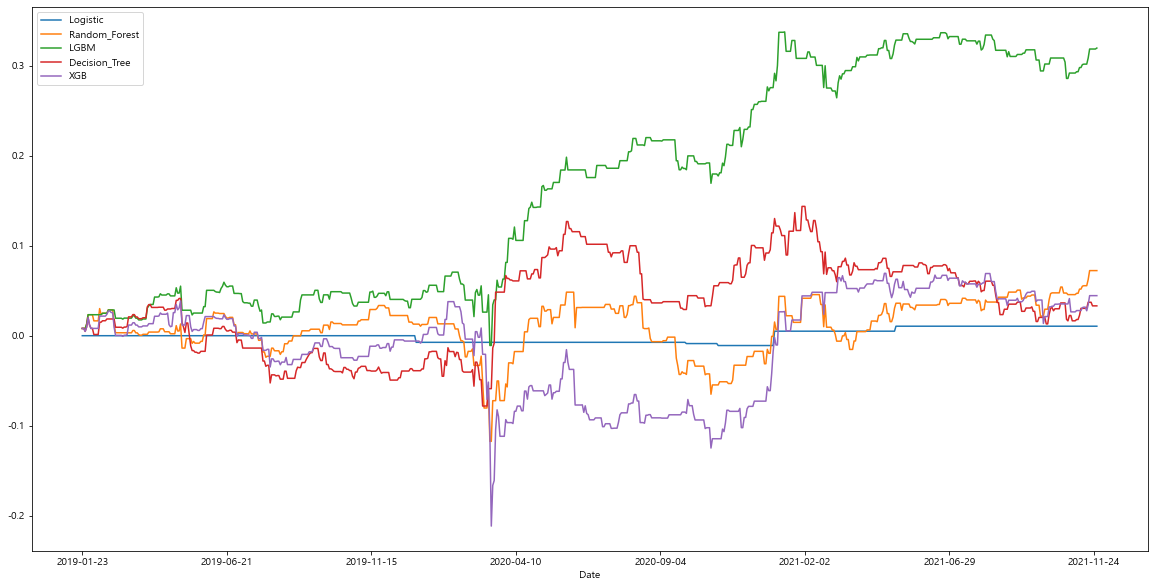

In [378]:
plt.figure(figsize = (20,10))
back_df = back_df.sort_index(ascending = True)
back_df.plot(figsize = (20,10))

# LGBM : 33.7%